In [1]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt


In [2]:
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [3]:
training_df = pd.read_csv("california_housing_train.csv")
training_df["median_house_value"] /= 1000.0
training_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5


In [4]:
training_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


In [11]:
def build_model(my_learning_rate):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(units=1,input_shape=(1,)))
    model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),loss="mean_squared_error",metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model

In [12]:
def train_model(model, df, feature, label, epochs, batch_size):
    history = model.fit(x=df[feature],y=df[label],batch_size=batch_size,epochs=epochs)
    trained_weight = model.get_weights()[0]
    trained_bias = model.get_weights()[1]
    epochs = history.epoch
    hist = pd.DataFrame(history.history)
    rmse = hist["root_mean_squared_error"]

    return trained_weight, trained_bias, epochs, rmse

print("Defined the create_model and traing_model functions.")

Defined the create_model and traing_model functions.


In [13]:
def plot_the_model(trained_weight, trained_bias, feature, label):
    plt.xlabel(feature)
    plt.ylabel(label)
    random_examples = training_df.sample(n=200)
    plt.scatter(random_examples[feature], random_examples[label])
    x0 = 0
    y0 = trained_bias
    x1 = 10000
    y1 = trained_bias + (trained_weight * x1)
    plt.plot([x0, x1], [y0, y1], c='r')
    plt.show()
    
def plot_the_loss_curve(epochs, rmse):
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Root Mean Squared Error")
    
    plt.plot(epochs, rmse, label="Loss")
    plt.legend()
    plt.ylim([rmse.min()*0.97, rmse.max()])
    plt.show()  

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


D:\leo francis\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/30
567/567 [==============================] - 2s 2ms/step - loss: 1476171.7500 - root_mean_squared_error: 1214.9780
Epoch 2/30
567/567 [==============================] - 1s 2ms/step - loss: 27979.9219 - root_mean_squared_error: 167.2720
Epoch 3/30
567/567 [==============================] - 1s 2ms/step - loss: 26959.9102 - root_mean_squared_error: 164.1947
Epoch 4/30
567/567 [==============================] - 1s 2ms/step - loss: 26271.7734 - root_mean_squared_error: 162.0857
Epoch 5/30
567/567 [==============================] - 1s 2ms/step - loss: 25379.1387 - root_mean_squared_error: 159.3083
Epoch 6/30
567/567 [==============================] - 1s 2ms/step - loss: 24836.7383 - root_mean_squared_error: 157.5968
Epoch 7/30
567/567 [==============================] - 1s 2ms/step - loss: 24364.4609 - root_mean_squared_error: 156.0912
Epoch 8/30
567/567 [==============================] - 1s 2ms/step - loss: 23644.8477 - root_mean_squared_error: 153.7688
Epoch 9/30
567/567 [=========

D:\leo francis\Anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


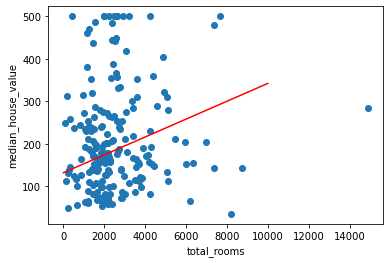

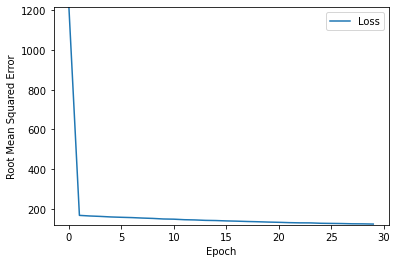

In [14]:
learning_rate = 0.01
epochs = 30
batch_size = 30

my_feature = "total_rooms"
my_label="median_house_value"

my_model = None

my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, my_feature, my_label,epochs, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

In [25]:
def predict_house_values(n, feature, label):
    batch = training_df[feature][10000:10000 + n]
    predicted_values = my_model.predict_on_batch(x=batch)

    print("feature   label          predicted")
    print("  value   value          value")
    print("          in thousand$   in thousand$")
    print("--------------------------------------")
    for i in range(n):
        print ("%5.0f %6.0f %15.0f" % (training_df[feature][10000 + i],training_df[label][10000 + i],predicted_values[i][0] ))
predict_house_values(10, my_feature, my_label)

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
    2     53             190
    2     92             202
    2     69             196
    2     62             213
    1     80             187
    2    295             227
    2    500             212
    2    342             225
    4    118             291
    2    128             215


D:\leo francis\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/24
567/567 [==============================] - 1s 2ms/step - loss: 37926.3086 - root_mean_squared_error: 194.7468
Epoch 2/24
567/567 [==============================] - 1s 2ms/step - loss: 18881.6504 - root_mean_squared_error: 137.4105
Epoch 3/24
567/567 [==============================] - 1s 2ms/step - loss: 15131.6035 - root_mean_squared_error: 123.0106
Epoch 4/24
567/567 [==============================] - 1s 2ms/step - loss: 14835.0713 - root_mean_squared_error: 121.7993
Epoch 5/24
567/567 [==============================] - 1s 2ms/step - loss: 14608.1006 - root_mean_squared_error: 120.8640
Epoch 6/24
567/567 [==============================] - 1s 2ms/step - loss: 14478.0322 - root_mean_squared_error: 120.3247
Epoch 7/24
567/567 [==============================] - 1s 2ms/step - loss: 14290.1016 - root_mean_squared_error: 119.5412
Epoch 8/24
567/567 [==============================] - 1s 2ms/step - loss: 14116.7949 - root_mean_squared_error: 118.8141
Epoch 9/24
567/567 [============

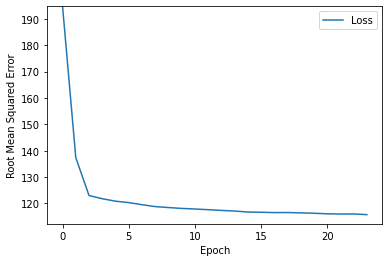

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
    2     53             190
    2     92             202
    2     69             196
    2     62             213
    1     80             187
    2    295             227
    2    500             212
    2    342             225
    4    118             291
    2    128             215
    2    187             226
    3     80             236
    2    112             226
    2     95             221
    2     69             212


In [19]:
training_df["rooms_per_person"] = training_df["total_rooms"] / training_df["population"]
my_feature = "rooms_per_person"

learning_rate = 0.06
epochs = 24
batch_size = 30

my_model = build_model(learning_rate)
weight, bias, epochs, mae = train_model(my_model, training_df,my_feature, my_label,epochs, batch_size)

plot_the_loss_curve(epochs, mae)
predict_house_values(15, my_feature, my_label)